<div style="background: linear-gradient(to left, black, black); padding: 15px; border-radius: 5px;">

### <span style="color: magenta; font-weight: bold;">1. **Orthogonal Factor Model**</span>

<span style="color: cyan;">
$$
X = \mu + \Lambda F + \epsilon
$$
</span>

where:
- $X \in \mathbb{R}^{p}$ is the vector of observed variables.
- $\mu \in \mathbb{R}^{p}$ is the mean of the observed variables.
- $\Lambda \in \mathbb{R}^{p \times k}$ is the loading matrix.
- $F \in \mathbb{R}^{k}$ is the vector of latent factors.
- $\epsilon \in \mathbb{R}^{p}$ is the vector of errors.

---

### <span style="color: magenta; font-weight: bold;">2. **Assumptions on Latent Factors**</span>

- **Uncorrelated Factors**:

<span style="color: cyan;">
$$
\text{Cov}(F) = I_k
$$
</span>

- **Independence from Errors**:

<span style="color: cyan;">
$$
\text{Cov}(F, \epsilon) = 0
$$
</span>

---

### <span style="color: magenta; font-weight: bold;">3. **Assumption on Error**</span>

- **No Correlation Among Errors**:

<span style="color: cyan;">
$$
\text{Cov}(\epsilon) = \Psi, \quad \Psi \in \mathbb{R}^{p \times p}, \quad \text{diagonal}
$$
</span>

- **Independence from Latent Factors**:

<span style="color: cyan;">
$$
\text{Cov}(F, \epsilon) = 0
$$
</span>

---

### <span style="color: magenta; font-weight: bold;">4. **Covariance Expressed in Terms of Latent Factors and Error**</span>

We start with:

<span style="color: cyan;">
$$
\Sigma = \text{Cov}(X) = E[(X - \mu)(X - \mu)']
$$
</span>

Substitute $X = \mu + \Lambda F + \epsilon$:

<span style="color: cyan;">
$$
\Sigma = E[(\Lambda F + \epsilon)(\Lambda F + \epsilon)']
$$
</span>

Expanding the product:

<span style="color: cyan;">
$$
\Sigma = E[\Lambda F F' \Lambda' + \Lambda F \epsilon' + \epsilon F' \Lambda' + \epsilon \epsilon']
$$
</span>


<span style="color: cyan;">
$$
\Sigma = \Lambda \Lambda' + \Psi
$$
</span>

---

### <span style="color: magenta; font-weight: bold;">5. **Why the Loading Matrix Need Not Be Unique**</span>

#### Proof:

**Original Model**:

<span style="color: cyan;">
$$
X = \mu + \Lambda F + \epsilon
$$
</span>

**Covariance of $X$**:

<span style="color: cyan;">
$$
\text{Cov}(X) = \Sigma = \Lambda \Lambda^T + \Psi
$$
</span>

**Orthogonal Rotation**: Let $Q \in \mathbb{R}^{k \times k}$ be an orthogonal matrix, $Q^T Q = I_k$. Apply rotation:

<span style="color: cyan;">
$$
\Lambda' = \Lambda Q
$$
</span>

Substituting $\Lambda' = \Lambda Q$:

<span style="color: cyan;">
$$
\text{Cov}(X) = (\Lambda Q)(Q^T \Lambda^T) + \Psi
$$
</span>

Since $Q^T Q = I_k$:

<span style="color: cyan;">
$$
\text{Cov}(X) = \Lambda \Lambda^T + \Psi
$$
</span>

---

### <span style="color: magenta; font-weight: bold;">6. **Rotation Schemes for Improving Interpretation**</span>

#### a) **Varimax Rotation**:
Maximizes the variance of squared loadings for each factor:

<span style="color: cyan;">
$$
\sum_{j=1}^k \left( \sum_{i=1}^p \lambda_{ij}^2 \right)^2 \quad \text{maximize over } Q
$$
</span>

#### b) **Quartimax Rotation**:
Maximizes the variance of squared loadings for each observed variable:

<span style="color: cyan;">
$$
\sum_{i=1}^p \left( \sum_{j=1}^k \lambda_{ij}^2 \right)^2 \quad \text{maximize over } Q
$$
</span>

#### c) **Equamax Rotation**:
Balance between varimax and quartimax:

<span style="color: cyan;">
$$
\sum_{i=1}^p \left( \sum_{j=1}^k \lambda_{ij}^2 \right)^2 + \sum_{j=1}^k \left( \sum_{i=1}^p \lambda_{ij}^2 \right)^2 \quad \text{maximize over } Q
$$
</span>

</div>


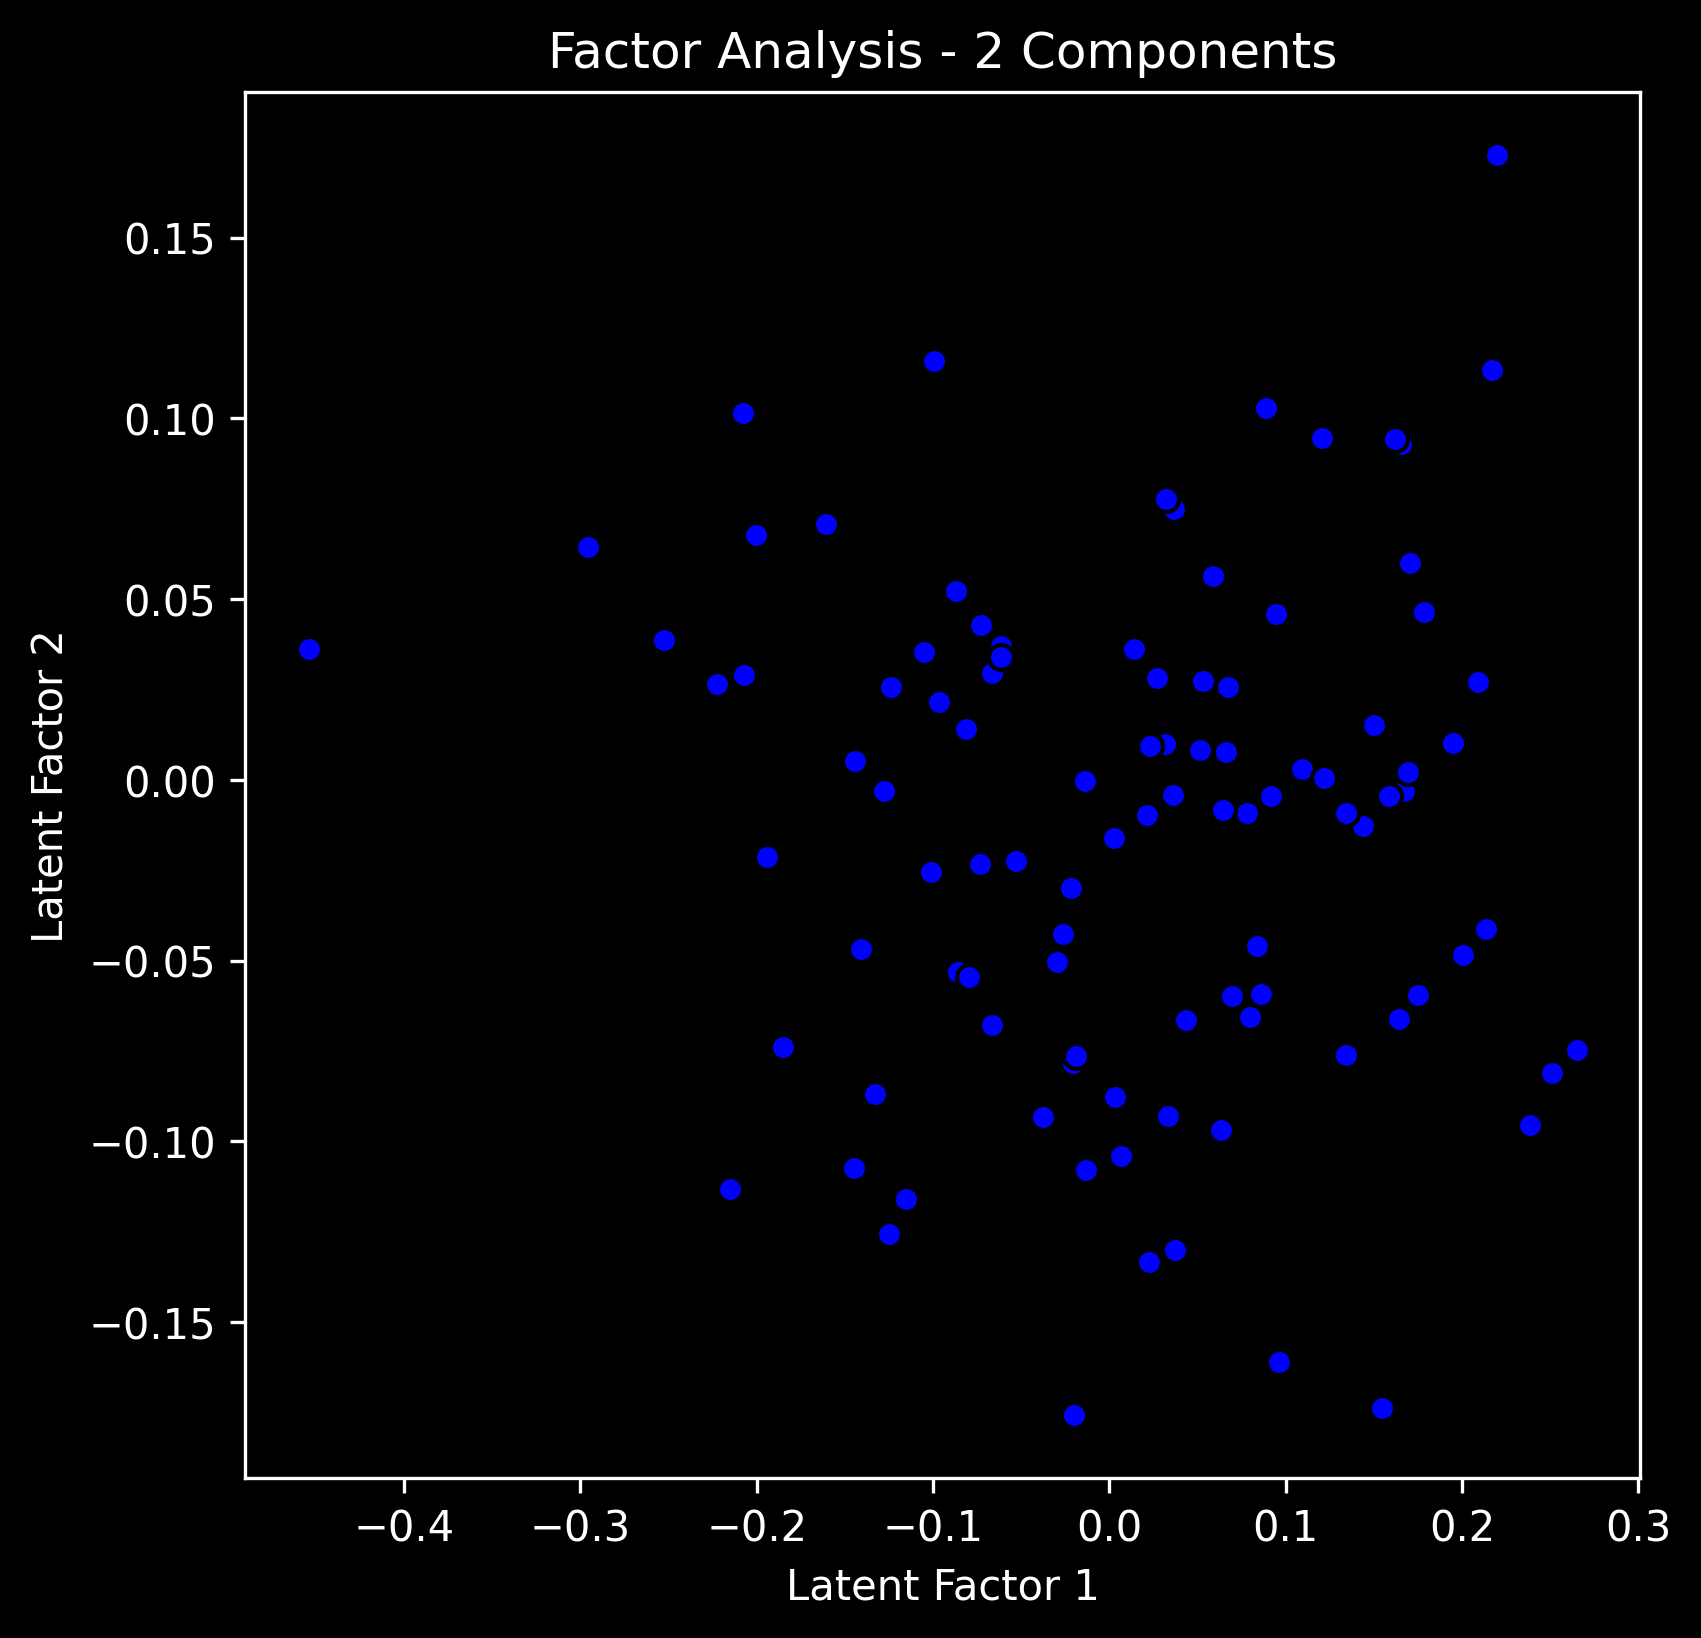

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from statsmodels.multivariate.factor import Factor

plt.style.use('dark_background')

X, _ = make_regression(
    n_samples=100, n_features=5, 
    noise=0.1, effective_rank=2, 
    random_state=47
)

fa = Factor(X, n_factor=2) 
fa_results = fa.fit()

X_fa = np.dot(X, fa_results.loadings)

# Plot the results to visualize
plt.figure(figsize=(6, 6), dpi=300)
plt.scatter(X_fa[:, 0], X_fa[:, 1], c='blue', edgecolors='k')
plt.xlabel('Latent Factor 1')
plt.ylabel('Latent Factor 2')
plt.title('Factor Analysis - 2 Components')
plt.savefig('factor_analysis.png', dpi=300)
plt.show()